In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from IPython.display import clear_output
import time

In [10]:
ligands = ['OSM1','EGF1','EGFTGFB1','TGFB1','PBS1',
#            'OSM2','EGF2','EGFTGFB2','TGFB2','PBS2',
           'OSMEGFTGFB','OSMEGF','OSMTGFB']
# Base path
basepath = '/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/crossCorrCCRnuc/'
colors = ['red', 'blue', 'green', 'magenta', 'cyan', 'black', 'purple', 'orange']

<Figure size 640x480 with 0 Axes>

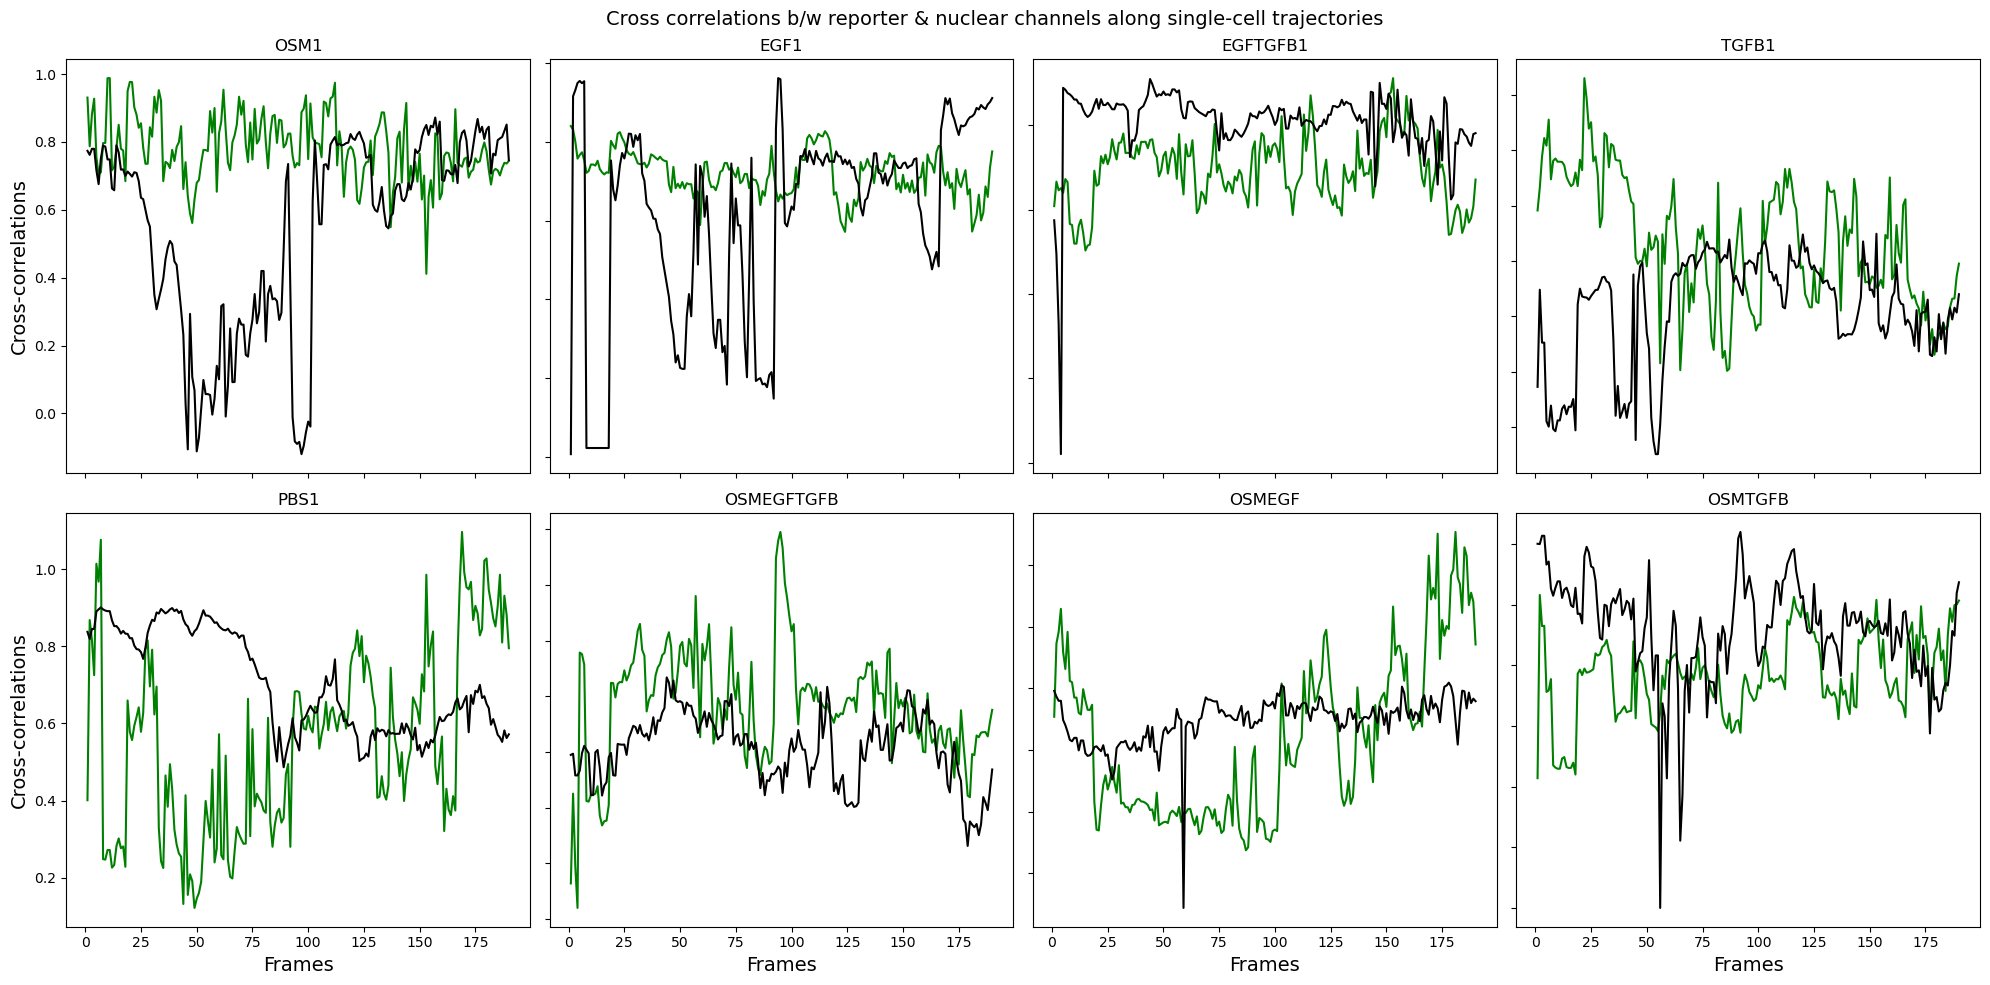

In [25]:
plt.clf()
fig, axs = plt.subplots(2, 4, figsize = (20, 10))

for i, cond in enumerate(ligands): 
    measure_file = basepath+'LI204601_P_CCRN_SCT_190_'+cond+'.dat'
    pred_file = basepath+'predsCorrLOCO/LI204601_P_tlen40_Feb22-2024_nS7_'+cond+'_LOCO_CCsPC10u0AwellsComb.txt'
    data = np.loadtxt(measure_file)
    data_pred = np.loadtxt(pred_file)
    n_frames = np.array(data_pred).size
    frames = np.arange(1, n_frames+1)
    # Calculate row and column for current subplot
    row, col = divmod(i, 4)
    
    axs[row, col].plot(frames, data_pred, color='g')
    axs[row, col].plot(frames, data[:, 1], color='k')
    axs[row, col].set_xlabel('Frames', fontsize=14)
    axs[row, col].set_ylabel('Cross-correlations', fontsize=14)
    axs[row, col].set_title(cond)
    
    # Use label_outer() to only show labels on the outer axes
    axs[row, col].label_outer()

fig.suptitle('Cross correlations b/w reporter & nuclear channels along single-cell trajectories', fontsize=14)
fig.tight_layout()
plt.savefig('cross_correlations_PredExp_190.png', dpi = 300, bbox_inches='tight')
#plt.show()